Please download the dataset from the below url

In [ ]:
!pip install -q keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/cricket/Train'
valid_path = '/content/drive/MyDrive/cricket/Test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/cricket/Train/*')
folders

['/content/drive/MyDrive/cricket/Train/pitch',
 '/content/drive/MyDrive/cricket/Train/field',
 '/content/drive/MyDrive/cricket/Train/ball',
 '/content/drive/MyDrive/cricket/Train/score',
 '/content/drive/MyDrive/cricket/Train/wicket',
 '/content/drive/MyDrive/cricket/Train/umpire',
 '/content/drive/MyDrive/cricket/Train/bat',
 '/content/drive/MyDrive/cricket/Train/groundstand']

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cricket/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 6071 images belonging to 8 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cricket/Test',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 1090 images belonging to 8 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
48/48 [==============================] - 2244s 47s/step - loss: 2.0787 - accuracy: 0.4362 - val_loss: 1.3645 - val_accuracy: 0.5881
Epoch 2/10
48/48 [==============================] - 158s 3s/step - loss: 1.1545 - accuracy: 0.6011 - val_loss: 1.2166 - val_accuracy: 0.5899
Epoch 3/10
48/48 [==============================] - 158s 3s/step - loss: 1.0367 - accuracy: 0.6333 - val_loss: 1.3915 - val_accuracy: 0.5661
Epoch 4/10
48/48 [==============================] - 157s 3s/step - loss: 0.9377 - accuracy: 0.6729 - val_loss: 1.0227 - val_accuracy: 0.6606
Epoch 5/10
48/48 [==============================] - 157s 3s/step - loss: 0.9991 - accuracy: 0.6706 - val_loss: 0.9349 - val_accuracy: 0.7128
Epoch 6/10
48/48 [==============================] - 157s 3s/step - loss: 0.8658 - accuracy: 0.7144 - val_loss: 0.9047 - val_accuracy: 0.7376
Epoch 7/10
48/48 [==============================] - 157s 3s/step - loss: 0.8693 - accuracy: 0.7142 - val_loss: 1.0459 - val_accuracy: 0.6761
Epoch 8/10


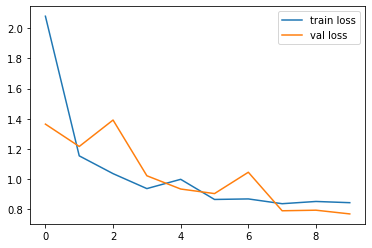

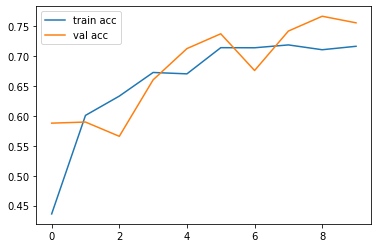

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [68]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('Model_Resnet50.hdf5')

In [69]:

y_pred = model.predict(test_set)


In [70]:
y_pred

array([[3.1518352e-01, 8.5523389e-02, 7.5300857e-02, ..., 3.2351331e-08,
        6.2218757e-04, 4.1204864e-01],
       [1.3494212e-05, 1.5582030e-08, 6.9155421e-06, ..., 3.3555727e-07,
        9.9955612e-01, 4.2208526e-04],
       [2.3513590e-03, 9.8652482e-01, 2.1814043e-03, ..., 2.1946442e-05,
        6.0238366e-05, 5.1090601e-03],
       ...,
       [3.6372650e-02, 8.5613048e-01, 7.8401724e-03, ..., 6.1319867e-07,
        1.3447484e-03, 8.8841259e-02],
       [6.1591816e-01, 5.9249755e-02, 2.3588715e-01, ..., 4.4524590e-08,
        1.3285637e-04, 6.1859157e-02],
       [9.7404861e-01, 2.1012420e-02, 1.4236905e-03, ..., 4.6482964e-09,
        1.1672574e-04, 3.1575263e-03]], dtype=float32)

In [71]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [72]:
y_pred

array([7, 6, 1, ..., 1, 0, 0])

In [73]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [74]:
model=load_model('Model_Resnet50.hdf5')

In [75]:
img=image.load_img('/content/drive/MyDrive/cricket/Test/ball/frame1600.jpg',target_size=(224,224))



In [76]:
image = image.img_to_array(img)

image = image/255.  

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
model.predict(image)




array([[9.6469480e-01, 7.3490893e-03, 2.5028256e-03, 3.8279374e-03,
        1.6133441e-04, 3.9202337e-06, 2.1899655e-03, 1.9270055e-02]],
      dtype=float32)

In [77]:
a=np.argmax(model.predict(image),axis=1)
a

array([0])

In [60]:
!pip install streamlit

     |████████████████████████████████| 7.0MB 8.4MB/s 
     |████████████████████████████████| 4.6MB 52.9MB/s 
     |████████████████████████████████| 112kB 56.4MB/s 
     |████████████████████████████████| 163kB 57.5MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 122kB 61.8MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=69875915f60dbb8ae99e67703e977040c7be28fc0bf4745c25369ac66ffdf953
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


In [61]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/Model_Resnet50.hdf5')
  return model
model=load_model()
st.write("""
         # Cricket Object Classification
         """
         )

file = st.file_uploader("Please upload a image", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):

        size = (224,224)
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        img = np.asarray(image)
        img_reshape = img[np.newaxis,...]
        prediction = model.predict(img_reshape)

        return prediction 
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names=['ball','bat','field','groundstand','pitch','score','umpire','wicket']
    string="This image most likely is: "+class_names[np.argmax(predictions)]
    st.success(string)


Writing app.py


In [62]:
!pip install pyngrok

     |████████████████████████████████| 747kB 7.6MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=f1f86a44e9d81f75122fd78c391b799d859e5dc57f7ea8010201218eadbdb08c
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [63]:
!ngrok authtoken 1ibGznAXU4EhunokYxtVrF85Cl7_7oWrpL34PKnXD9ecDrRy1

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [64]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [65]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

<NgrokTunnel: "http://5d3ffc2edf3e.ngrok.io" -> "http://localhost:80">

In [66]:
!cat /content/nohup.out

2021-04-07 11:17:12.327015: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.247.27.206:8501

2021-04-07 11:17:13.964425: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-07 11:17:13.973721: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-07 11:17:13.990589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-07 11:17:13.991116: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceM